##### import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import missingno as msno 
import os
from fancyimpute import IterativeImputer# Window의 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,classification_report
)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


%config InlineBackend.figure_format = 'retina'

# C:/Users/정호원/OneDrive/바탕 화면

In [2]:
os.getcwd()

'c:\\Users\\정호원\\OneDrive\\바탕 화면\\baf\\5주차 및 5주차 과제'

##### Data Loading 및 1차 전처리(간단히)

In [3]:
train = pd.read_csv('train.csv',encoding='cp949')
test = pd.read_csv('test.csv',encoding='cp949')
df_train = train.copy()
df_test = test.copy()

In [4]:
# 변수 명 수정 df_train
# 괄호 뒤의 수치들은 이미 위 markdown으로 단위가 지정되었기 때문에 제거
df_train = pd.DataFrame(df_train)
df_train.columns = [col.split('(')[0].strip() for col in df_train.columns]

###### 요일 변수 생성

In [5]:
# 요일 추가
df_train['Weekday'] = pd.to_datetime(df_train['Date'], format='%d/%m/%Y').dt.day_name() 
df_train

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Weekday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes,Friday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,31/10/2018,1507,19,8.4,53,NaN,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes,Wednesday
8036,31/10/2018,1176,20,7.6,59,0.7,2000,0.0,0.0,0.0,0.0,NaN,No Holiday,Yes,Wednesday
8037,31/10/2018,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,Wednesday
8038,31/10/2018,1088,22,6.8,58,2.2,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Wednesday


###### 계절 결측 처리 - train

In [6]:
df_train['Seasons'] = np.where(df_train['Seasons'].ffill() == df_train['Seasons'].bfill(), df_train['Seasons'].ffill(), np.nan)
print(df_train['Seasons'].isna().sum())
df_train['Seasons'][0] = df_train['Seasons'][1]
df_train[df_train['Seasons'].isna()]

1


,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Weekday


###### 온도 결측 처리 - train

In [7]:
# 이 코드에서 만약 결측이 발생한 행의 다음 행이 결측이거나 전 행이 결측이면 
# 가장 가까운 행의 값으로 대체하는 방향으로 가고자 함

for i in range(len(df_train)):
    if pd.isna(df_train.loc[i, 'Temperature']):
        # 바로 앞 행과 바로 뒤 행의 값이 모두 결측치가 아닌 경우
        if not pd.isna(df_train.loc[i-1, 'Temperature']) and not pd.isna(df_train.loc[i+1, 'Temperature']):
            # 바로 앞 행과 바로 뒤 행의 온도 값 평균 계산
            mean_temperature = (df_train.loc[i-1, 'Temperature'] + df_train.loc[i+1, 'Temperature']) / 2
            # 결측치 대체
            df_train.loc[i, 'Temperature'] = mean_temperature
        # 바로 앞 행이 결측치인 경우
        elif pd.isna(df_train.loc[i-1, 'Temperature']):
            df_train.loc[i, 'Temperature'] = df_train.loc[i+1, 'Temperature']
        # 바로 뒤 행이 결측치인 경우
        else:
            df_train.loc[i, 'Temperature'] = df_train.loc[i-1, 'Temperature']

print(df_train.isna().sum()) # 모두 대체되었음

Date                       0
Rented Bike Count          0
Hour                       0
Temperature                0
Humidity                   0
Wind speed               802
Visibility                 0
Dew point temperature      0
Solar Radiation            0
Rainfall                   0
Snowfall                   0
Seasons                    0
Holiday                    0
Functioning Day            0
Weekday                    0
dtype: int64


###### 풍속 결측 처리 - train

In [8]:
# 앞 뒤 모두 결측인 경우 앞에서 결측이 안 보이는 행을 찾고 뒤에도 
# 결측이 안 보이는 가장 가까운  행을 찾은 다음 그 평균으로 대체

for i in range(len(df_train)):
    if pd.isna(df_train.loc[i, 'Wind speed']):
        # 바로 앞 행과 바로 뒤 행의 값이 모두 결측치가 아닌 경우
        if not pd.isna(df_train.loc[i-1, 'Wind speed']) and not pd.isna(df_train.loc[i+1, 'Wind speed']):
            # 바로 앞 행과 바로 뒤 행의 풍속 값 평균 계산
            mean_wind_speed = (df_train.loc[i-1, 'Wind speed'] + df_train.loc[i+1, 'Wind speed']) / 2
            # 결측치 대체
            df_train.loc[i, 'Wind speed'] = mean_wind_speed
        # 바로 앞 행이 결측치인 경우
        elif pd.isna(df_train.loc[i-1, 'Wind speed']):
            df_train.loc[i, 'Wind speed'] = df_train.loc[i+1, 'Wind speed']
        # 바로 뒤 행이 결측치인 경우
        elif pd.isna(df_train.loc[i+1, 'Wind speed']):
            df_train.loc[i, 'Wind speed'] = df_train.loc[i-1, 'Wind speed']
        # 앞 뒤 모두 결측인 경우
        else:
            # 앞에서부터 결측이 아닌 행 찾기
            j = 1
            while pd.isna(df_train.loc[i-j, 'Wind speed']):
                j += 1
            # 뒤에서부터 결측이 아닌 행 찾기
            k = 1
            while pd.isna(df_train.loc[i+k, 'Wind speed']):
                k += 1
            # 결측치가 아닌 값을 찾은 경우 그 값을 대체로 사용
            if not pd.isna(df_train.loc[i-j, 'Wind speed']):
                df_train.loc[i, 'Wind speed'] = df_train.loc[i-j, 'Wind speed']
            elif not pd.isna(df_train.loc[i+k, 'Wind speed']):
                df_train.loc[i, 'Wind speed'] = df_train.loc[i+k, 'Wind speed']

print(df_train.isna().sum()) # 결측이 모두 대체됨

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
Weekday                  0
dtype: int64


In [9]:
# 변수 타입의 변화
df_train.Holiday = df_train.Holiday.astype('category')
df_train['Functioning Day'] = df_train['Functioning Day'].astype('category')
df_train.Seasons = df_train.Seasons.astype('category')

df_train

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Weekday
0,01/12/2017,254,0,-5.2,37,2.20,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
1,01/12/2017,204,1,-5.5,38,0.80,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
2,01/12/2017,173,2,-6.0,39,1.00,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
3,01/12/2017,107,3,-6.2,40,0.90,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
4,01/12/2017,78,4,-6.0,36,1.20,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,31/10/2018,1507,19,8.4,53,1.25,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes,Wednesday
8036,31/10/2018,1176,20,7.6,59,0.70,2000,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,Wednesday
8037,31/10/2018,1069,21,7.6,59,3.00,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,Wednesday
8038,31/10/2018,1088,22,6.8,58,2.20,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Wednesday


In [10]:
df_test = test.copy()

In [11]:
df_test

,Date,Hour,Temperature(吏퇒),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(吏퇒),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/11/2018,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,01/11/2018,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,01/11/2018,2,4.4,64,NaN,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,01/11/2018,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,01/11/2018,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
716,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
717,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
718,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [12]:
# 변수 명 수정 df_test
# 괄호 뒤의 수치들은 이미 위 markdown으로 단위가 지정되었기 때문에 제거
df_test = pd.DataFrame(df_test)
df_test.columns = [col.split('(')[0].strip() for col in df_test.columns]

###### 계절 결측 처리 - test

In [13]:
df_test['Seasons'].fillna('Autumn', inplace=True)

###### 온도 결측 처리 - test

In [14]:
for i in range(len(df_test)):
    if pd.isna(df_test.loc[i, 'Temperature']):
        # 바로 앞 행과 바로 뒤 행의 값이 모두 결측치가 아닌 경우
        if not pd.isna(df_test.loc[i-1, 'Temperature']) and not pd.isna(df_test.loc[i+1, 'Temperature']):
            # 바로 앞 행과 바로 뒤 행의 온도 값 평균 계산
            mean_temperature = (df_test.loc[i-1, 'Temperature'] + df_test.loc[i+1, 'Temperature']) / 2
            # 결측치 대체
            df_test.loc[i, 'Temperature'] = mean_temperature
        # 바로 앞 행이 결측치인 경우
        elif pd.isna(df_test.loc[i-1, 'Temperature']):
            df_test.loc[i, 'Temperature'] = df_test.loc[i+1, 'Temperature']
        # 바로 뒤 행이 결측치인 경우
        else:
            df_test.loc[i, 'Temperature'] = df_test.loc[i-1, 'Temperature']

print(df_test.isna().sum()) # 모두 대체되었음

Date                      0
Hour                      0
Temperature               0
Humidity                  0
Wind speed               74
Visibility                0
Dew point temperature     0
Solar Radiation           0
Rainfall                  0
Snowfall                  0
Seasons                   0
Holiday                   0
Functioning Day           0
dtype: int64


###### 풍속 결측 처리 - test

In [15]:
for i in range(len(df_test)):
    if pd.isna(df_test.loc[i, 'Wind speed']):
        # 바로 앞 행과 바로 뒤 행의 값이 모두 결측치가 아닌 경우
        if not pd.isna(df_test.loc[i-1, 'Wind speed']) and not pd.isna(df_test.loc[i+1, 'Wind speed']):
            # 바로 앞 행과 바로 뒤 행의 풍속 값 평균 계산
            mean_wind_speed = (df_test.loc[i-1, 'Wind speed'] + df_test.loc[i+1, 'Wind speed']) / 2
            # 결측치 대체
            df_test.loc[i, 'Wind speed'] = mean_wind_speed
        # 바로 앞 행이 결측치인 경우
        elif pd.isna(df_test.loc[i-1, 'Wind speed']):
            df_test.loc[i, 'Wind speed'] = df_test.loc[i+1, 'Wind speed']
        # 바로 뒤 행이 결측치인 경우
        elif pd.isna(df_train.loc[i+1, 'Wind speed']):
            df_test.loc[i, 'Wind speed'] = df_test.loc[i-1, 'Wind speed']
        # 앞 뒤 모두 결측인 경우
        else:
            # 앞에서부터 결측이 아닌 행 찾기
            j = 1
            while pd.isna(df_test.loc[i-j, 'Wind speed']):
                j += 1
            # 뒤에서부터 결측이 아닌 행 찾기
            k = 1
            while pd.isna(df_test.loc[i+k, 'Wind speed']):
                k += 1
            # 결측치가 아닌 값을 찾은 경우 그 값을 대체로 사용
            if not pd.isna(df_test.loc[i-j, 'Wind speed']):
                df_test.loc[i, 'Wind speed'] = df_test.loc[i-j, 'Wind speed']
            elif not pd.isna(df_train.loc[i+k, 'Wind speed']):
                df_test.loc[i, 'Wind speed'] = df_test.loc[i+k, 'Wind speed']

print(df_test.isna().sum()) # 결측이 모두 대체됨

Date                     0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64


In [16]:
# 변수 타입의 변화
df_test.Holiday = df_test.Holiday.astype('category')
df_test['Functioning Day'] = df_test['Functioning Day'].astype('category')
df_test.Seasons = df_test.Seasons.astype('category')

df_test

,Date,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/11/2018,0,5.7,62,2.30,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,01/11/2018,1,5.1,65,1.60,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,01/11/2018,2,4.4,64,1.15,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,01/11/2018,3,4.2,65,0.70,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,01/11/2018,4,3.6,70,0.80,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,30/11/2018,19,4.2,34,2.60,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
716,30/11/2018,20,3.4,37,2.30,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
717,30/11/2018,21,2.6,39,0.30,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
718,30/11/2018,22,2.1,41,1.00,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [17]:
# 요일 추가
df_test['Weekday'] = pd.to_datetime(df_test['Date'], format='%d/%m/%Y').dt.day_name() 
df_test

,Date,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Weekday
0,01/11/2018,0,5.7,62,2.30,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,Thursday
1,01/11/2018,1,5.1,65,1.60,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Thursday
2,01/11/2018,2,4.4,64,1.15,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Thursday
3,01/11/2018,3,4.2,65,0.70,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Thursday
4,01/11/2018,4,3.6,70,0.80,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,30/11/2018,19,4.2,34,2.60,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
716,30/11/2018,20,3.4,37,2.30,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
717,30/11/2018,21,2.6,39,0.30,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
718,30/11/2018,22,2.1,41,1.00,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday


##### 명목형 변수 - 데이터 수치화

###### 명목형 변수 - 데이터 수치화 - 계절

In [18]:
df_train2 = df_train.copy()
df_test2 = df_test.copy()

# Winter 0
# Spring 1
# Summer 2
# Autumn 3
df_train2['Seasons_numbers'] = df_train2['Seasons'].map({'Winter':0,'Spring':1, 'Summer':2, 'Autumn':3})
df_test2['Seasons_numbers'] = df_test2['Seasons'].map({'Winter':0,'Spring':1, 'Summer':2, 'Autumn':3})

###### 명목형 변수 - 데이터 수치화 - 공휴일

In [19]:
# Holiday Yes 1 
# Holiday No 0

df_train2['Holiday_numbers'] = df_train2['Holiday'].map({'No Holiday':0, 'Holiday':1})
df_test2['Holiday_numbers'] = df_test2['Holiday'].map({'No Holiday':0, 'Holiday':1})

###### 명목형 변수 - 데이터 수치화 - Functioning Day

In [20]:
# Functioning Yes 1
# Functioning No 0
df_train2['Functioning Day_numbers'] = df_train2['Functioning Day'].map({'Yes':1, 'No':0})
df_test2['Functioning Day_numbers'] = df_test2['Functioning Day'].map({'Yes':1, 'No':0})

###### 명목형 변수 - 데이터 수치화 - 요일

In [21]:
# Monday 1
# Tuesday 2
# Wednesday 3
# Thursday 4
# Friday 5
# Saturday 6
# Sunday 7

df_train2['Weekday_numbers'] = df_train2['Weekday'].map({'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7})
df_test2['Weekday_numbers'] = df_test2['Weekday'].map({'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7})

df_train2.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Weekday,Seasons_numbers,Holiday_numbers,Functioning Day_numbers,Weekday_numbers
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,0,1,5
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,0,1,5
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,0,1,5
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,0,1,5
4,01/12/2017,78,4,-6.0,36,1.2,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,0,1,5


##### 2차 전처리 

##### df_train2, df_test2 Scaling

In [22]:
df_train3 = df_train2.copy()
df_test3 = df_test2.copy()

df_train3 = df_train3.drop(['Date','Seasons','Holiday','Functioning Day','Weekday'], axis=1)
df_test3 = df_test3.drop(['Date','Seasons','Holiday','Functioning Day','Weekday'], axis=1)

In [23]:
df_train3.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons_numbers,Holiday_numbers,Functioning Day_numbers,Weekday_numbers
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,5
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,5
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,5
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,5
4,78,4,-6.0,36,1.2,2000,-18.6,0.0,0.0,0.0,0,0,1,5


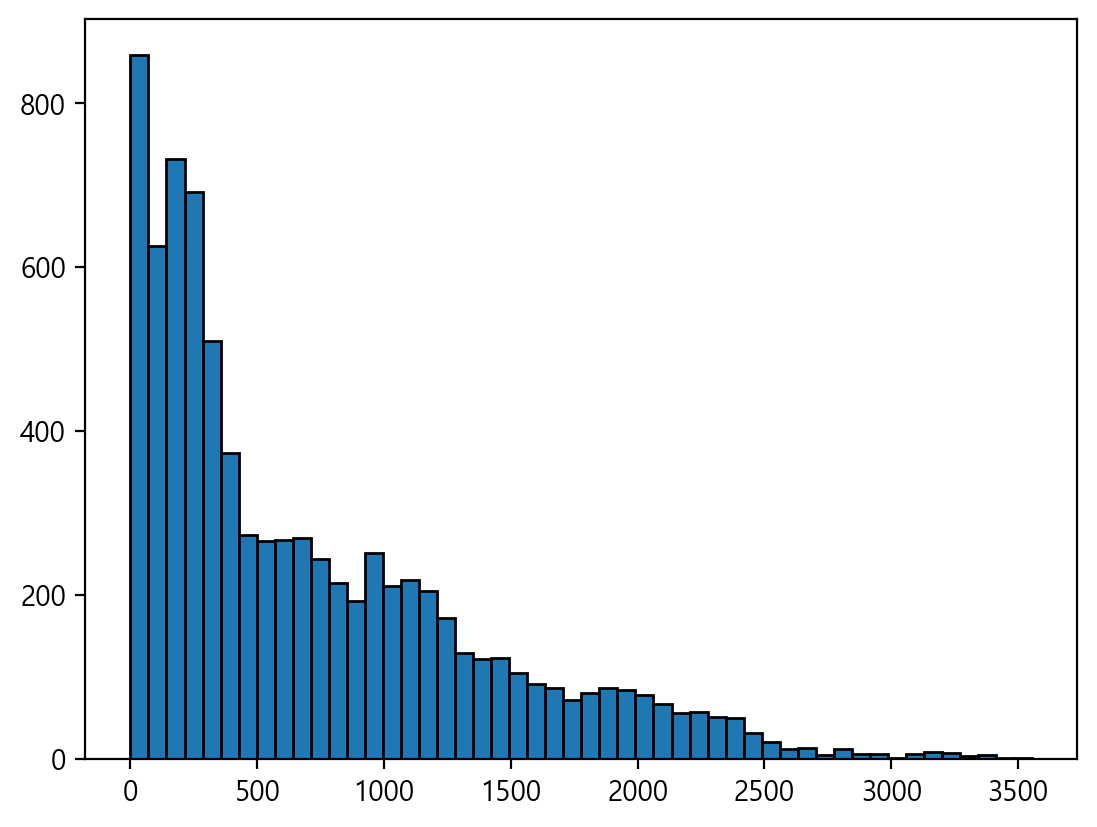

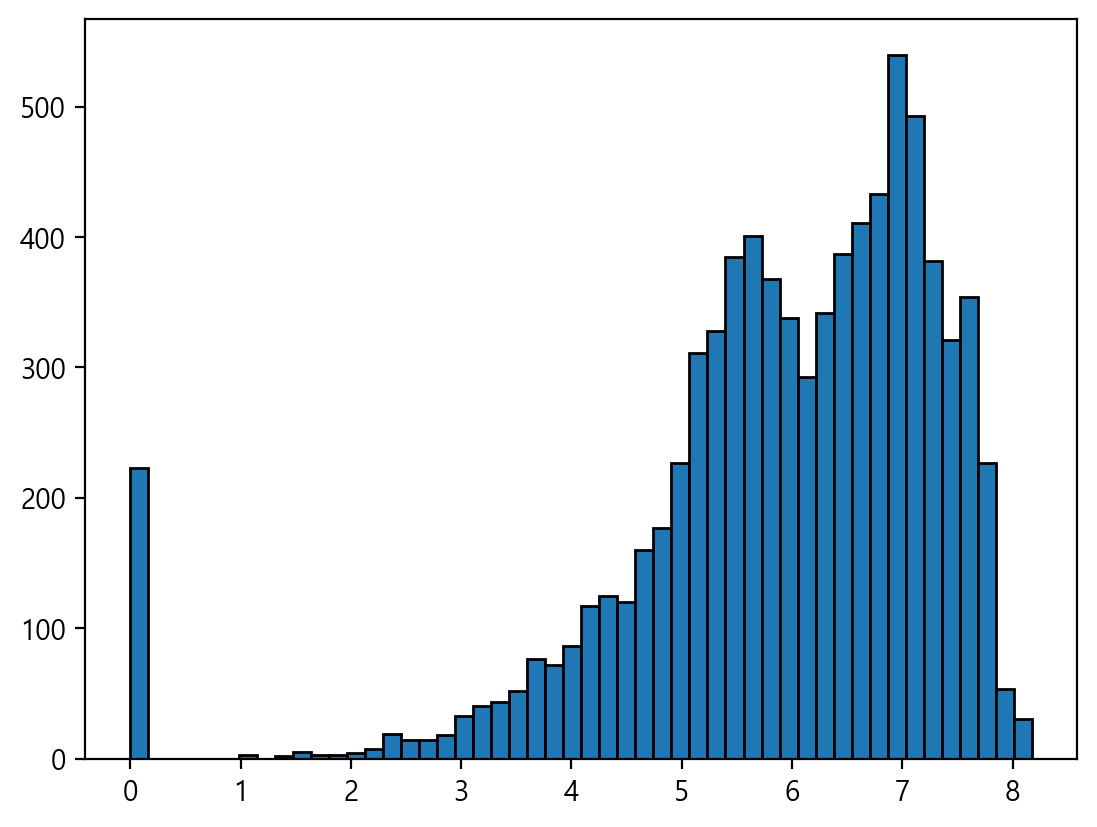

In [24]:
# y의 분포를 알아보고자 함
plt.hist(df_train3['Rented Bike Count'], bins=50, edgecolor='black')
plt.show()

# 로그변환
log_rented = np.log1p(df_train3['Rented Bike Count']) 

plt.hist(log_rented, bins=50, edgecolor='black')
plt.show() 

In [25]:
from scipy.stats import skew

data_column = df_train3['Rented Bike Count']
skewness_origin = skew(data_column)
skewness_logtrans = skew(log_rented)

In [26]:
skewness_origin

1.1536838082608742

In [27]:
skewness_logtrans
# 절대값이 클수록 치우침이 크다는 것을 의미하므로  0에 가까울수록 데이터가 덜 치우쳤음을 의미한다
# 따라서 로그스케일을 진행하지 않는다

-1.7431829425943886

In [28]:
# 이미 test dataset 이 존재하므로 train에서 2가지로 split 함

X = df_train3.drop('Rented Bike Count', axis=1)
y = df_train3['Rented Bike Count']
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

###### Standard Scaling - 필요는 없지만 해보았음

In [29]:
#객체 생성
ss = StandardScaler()

#학습 및 변환
X_train_ss = ss.fit_transform(X_train)
X_val_ss = ss.transform(X_val)

print("train")
print(f'평균: {X_train_ss.mean()}\n분산: {X_train_ss.std()}')
print("valid")
print(f'평균: {X_val_ss.mean()}\n분산: {X_val_ss.std()}')

train
평균: -1.6230585358086867e-17
분산: 1.0
valid
평균: -0.005988592137441466
분산: 0.9883791086222683


###### Min Max Scaling - 필요는 없지만 해보았음

In [30]:
#객체 생성
mms = MinMaxScaler()

#학습 및 변환
X_train_mms = mms.fit_transform(X_train)
X_val_mms = mms.transform(X_val)

print("train")
print(f'최대: {X_train_mms.max()}\n최소: {X_train_mms.min()}')
print("valid")
print(f'최대: {X_val_mms.max()}\n최소: {X_val_mms.min()}')

train
최대: 1.0000000000000002
최소: 0.0
valid
최대: 1.0000000000000002
최소: -0.00560652395514781


###### Max Absolute Scaling - 필요는 없지만 해보았음

In [31]:
#객체 생성
mas = MaxAbsScaler()

#학습 및 변환
X_train_mas = mas.fit_transform(X_train)
X_val_mas = mas.transform(X_val)

print("train")
print(f'최대: {X_train_mas.max()}\n최소: {X_train_mas.min()}')
print("valid")
print(f'최대: {X_val_mas.max()}\n최소: {X_val_mas.min()}')

train
최대: 1.0
최소: -1.0
valid
최대: 1.0
최소: -0.9705882352941175


###### Robust Scaling - 필요는 없지만 해보았음

In [32]:
#객체 생성
rs = RobustScaler()

#학습 및 변환
X_train_rs = rs.fit_transform(X_train)
X_val_rs = rs.transform(X_val)

print("train")
print(f'평균: {X_train_rs.mean()}\n분산: {X_train_rs.std()}')
print("valid")
print(f'평균: {X_val_rs.mean()}\n분산: {X_val_rs.std()}')

train
평균: 0.05774159084370661
분산: 0.6720610909763179
valid
평균: 0.05401373236795092
분산: 0.6672265843561902


#### 모델 학습

##### 선택 모델 1 : Decision Tree


##### 선택 모델 1 : Decision Tree : 선택근거


###### Decision Tree를 선택한 이유는 다음과 같다. 이전 과정에서 명목형 변수를 수치형 변수로 생성하고, 다양한 변수들을 EDA 하는 과정을 거쳤는데, 그 과정 속에서 패턴을 학습하고 이를 바탕으로 궁극적으로 따릉이 대여량을 예측할 수 있다는 이점이 있다. 따라서 변수의 특성이 종속 변수에 어느정도 영향을 끼치는 지를 알 수 있다. 또한, Decision Tree는 각 특성의 중요도를 파악할 수 있고, 해석이 용이하며, 비선형 관계일 경우에도 보다 잘 파악할 수 있다는 이점이 있다. 하지만, Decision Tree는 과적합의 위험성이 있기 때문에, 하이퍼 파라미터 튜닝이나 변수들의 중요도, 변수들의 관계 등을 잘 파악할 필요성이 있다.

In [33]:
X_test = df_test3.copy()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Hour                     720 non-null    int64   
 1   Temperature              720 non-null    float64 
 2   Humidity                 720 non-null    int64   
 3   Wind speed               720 non-null    float64 
 4   Visibility               720 non-null    int64   
 5   Dew point temperature    720 non-null    float64 
 6   Solar Radiation          720 non-null    float64 
 7   Rainfall                 720 non-null    float64 
 8   Snowfall                 720 non-null    float64 
 9   Seasons_numbers          720 non-null    category
 10  Holiday_numbers          720 non-null    category
 11  Functioning Day_numbers  720 non-null    category
 12  Weekday_numbers          720 non-null    int64   
dtypes: category(3), float64(6), int64(4)
memory usage: 58.8 KB


In [34]:
df_train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8040 non-null   int64   
 1   Hour                     8040 non-null   int64   
 2   Temperature              8040 non-null   float64 
 3   Humidity                 8040 non-null   int64   
 4   Wind speed               8040 non-null   float64 
 5   Visibility               8040 non-null   int64   
 6   Dew point temperature    8040 non-null   float64 
 7   Solar Radiation          8040 non-null   float64 
 8   Rainfall                 8040 non-null   float64 
 9   Snowfall                 8040 non-null   float64 
 10  Seasons_numbers          8040 non-null   category
 11  Holiday_numbers          8040 non-null   category
 12  Functioning Day_numbers  8040 non-null   category
 13  Weekday_numbers          8040 non-null   int64   
dtypes: categ

In [35]:
from sklearn.tree import DecisionTreeRegressor
model_decision_tree = DecisionTreeRegressor(random_state=42)


In [36]:
print(model_decision_tree.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


###### 하이퍼파라미터 설명

- ccp_alpha : 비용 복잡성 가지치기를 제어하는 매개변수, 트리의 복잡성을 줄이는 데 사용됨. 높은 값은 가지를 덜 자르고 낮은 값은 더 많이 자름.

- class_weight : 각 클래스에 대한 가중치를 지정하는 매개변수, 데이터의 불균형이 있을 때 사용됨. None인 경우 모든 클래스에 동일한 가중치를 부여함.

- criterion : 노드를 분할하는 데 사용되는 기준. 'gini'는 지니 불순도, 'entropy'는 엔트로피를 사용하여 분할.

- max_depth : 트리의 최대 깊이를 제한하는 매개변수, 과적합을 방지하기 위해 사용됨. None인 경우 깊이 제한이 없음.

- max_features : 각 노드에서 분할에 고려할 최대 특성 수를 지정함. None인 경우 모든 특성을 고려함.

- max_leaf_nodes : 트리의 리프 노드 수를 제한하는 매개변수. None인 경우 제한이 없음.

- min_impurity_decrease : 불순도 감소량이 이 값보다 작으면 더 이상 분할하지 않음. 

- min_samples_leaf : 리프 노드가 가져야 하는 최소 샘플 수를 지정.

- min_samples_split : 노드를 분할하기 위해 필요한 최소 샘플 수를 지정.

- min_weight_fraction_leaf : 리프 노드의 가중치 합이 이 값보다 작으면 분할하지 않음.

- random_state : 모델을 학습할 때 사용되는 난수 생성 시드, 동일한 시드를 사용하면 학습 결과를 재현할 수 있음.

- splitter : 노드를 분할할 때 사용할 전략, 'best' 또는 'random' 중 하나를 선택. 'best'는 가장 좋은 분할을 선택하고, 'random'은 무작위로 분할을 선택.

In [37]:
# X_train, X_val, y_train, y_val

In [38]:
model_decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

##### 선택 모델 1 : Decision Tree : 평가지표


###### 따릉이 대여량 예측은 분류모델이 아닌 회귀모델이기 때문에 f1 score, acuuracy등과 같은 binary 지표 대신 mse mae rmse등과 같은 지표를 사용하여 평가한다.

In [39]:
y_pred_dt = model_decision_tree.predict(X_val)

# Mean Squared Error (MSE) 계산
mse = mean_squared_error(y_val, y_pred_dt)
print(f'Mean Squared Error (MSE): {mse:.4f}')

# MAE 계산
mae = mean_absolute_error(y_val, y_pred_dt)
print(f"Mean Absolute Error (MAE): {mae}")

# Root Mean Squared Error (RMSE) 계산
rmse = mean_squared_error(y_val, y_pred_dt, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# R-squared (결정 계수) 계산
r_squared = r2_score(y_val, y_pred_dt)
print(f'R-squared (R^2): {r_squared:.4f}')

# Decision Tree는 코드의 진행방식이 이렇다...를 보여주기 위한 모델이었고,
# 실질적으로는 Random Forest를 통해 따릉이 대여량 예측을 하고자 한다.

Mean Squared Error (MSE): 61464.8116
Mean Absolute Error (MAE): 138.13370646766168
Root Mean Squared Error (RMSE): 247.9210
R-squared (R^2): 0.8599


##### 선택 모델 2 : Random Forest 


##### 선택 모델 2 : Random Forest : 선택 근거


###### Random Forest는 여러 개의 Decision Tree를 사용하고 각각의 트리를 다양한 데이터로 훈련시키기 때문에 과적합을 줄일 수 있다. 또한, 각 트리에서 사용된 특성의 중요도를 평가할 수 있다. 이를 통해 어떤 특성이 예측에 미치는 영향력이 큰지 파악할 수 있다. 마지막으로, 각 트리는 전체 데이터에서 무작위로 선택된 부분집합을 사용하여 훈련되기 때문에 다양한 특성과 샘플을 활용할 수 있다.

In [40]:
from sklearn.ensemble import RandomForestRegressor
model_random_forest = RandomForestRegressor(random_state=42)


In [41]:
model_random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
y_pred_rf = model_random_forest.predict(X_val)

# Mean Squared Error (MSE) 계산
mse = mean_squared_error(y_val, y_pred_rf)
print(f'Mean Squared Error (MSE): {mse:.4f}')

# MAE 계산
mae = mean_absolute_error(y_val, y_pred_rf)
print(f"Mean Absolute Error (MAE): {mae}")

# Root Mean Squared Error (RMSE) 계산
rmse = mean_squared_error(y_val, y_pred_rf, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# R-squared (결정 계수) 계산
r_squared = r2_score(y_val, y_pred_rf)
print(f'R-squared (R^2): {r_squared:.4f}')

# 실제로도 더 개선된 모습을 보임

Mean Squared Error (MSE): 31714.7797
Mean Absolute Error (MAE): 102.20105099502489
Root Mean Squared Error (RMSE): 178.0864
R-squared (R^2): 0.9277


In [43]:
hyper_0 = model_random_forest.get_params()
print(hyper_0)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [44]:
# 해당 parameter를 바탕으로 조정

##### Hyper Parameter Tuning

##### GridSearch

In [45]:
# 혹시 몰라 다시 import
from sklearn.datasets import make_regression
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [46]:
# Random Forest 회귀 모델 생성
model_random_forest = RandomForestRegressor(random_state=42)

# 'n_estimators': [100, 300, 500]
# 'max_features': ['auto', 'sqrt', log2]
# 'min_samples_leaf': [1, 2, 4]
# 이렇게 진행하여 돌렸지만 5시간이 넘게 걸려 중단하여 파라미터를 조정함

# 마찬가지로 다르게 해 본 결과 수행 시간이 너무 오래 걸리기 때문에 하나씩 조정

###### 초기 Base model의 R-Square는 0.9277임

In [47]:
model_random_forest_1 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None, min_samples_split=2, 
                                              min_samples_leaf=1, max_features='sqrt')

model_random_forest_1.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=42)

In [48]:
y_pred_rf_1 = model_random_forest_1.predict(X_val)
# MSE
mse_1 = mean_squared_error(y_val, y_pred_rf_1)
print(f'Mean Squared Error (MSE): {mse_1:.4f}')
# MAE
mae_1 = mean_absolute_error(y_val, y_pred_rf_1)
print(f"Mean Absolute Error (MAE): {mae_1}")
# RMSE
rmse_1 = mean_squared_error(y_val, y_pred_rf_1, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse_1:.4f}')
# R-squared
r_squared_1 = r2_score(y_val, y_pred_rf_1)
print(f'R-squared (R^2): {r_squared_1:.4f}')

Mean Squared Error (MSE): 38175.4467
Mean Absolute Error (MAE): 123.47422263681591
Root Mean Squared Error (RMSE): 195.3854
R-squared (R^2): 0.9130


In [49]:
model_random_forest_2 = RandomForestRegressor(random_state=42, n_estimators=110, max_depth=27, min_samples_split=2, 
                                              min_samples_leaf=1, max_features='sqrt')

model_random_forest_2.fit(X_train, y_train)

# max_features는 sqrt로 고정
# max_depth는 27일 때, R-Squared가 가장 큼

RandomForestRegressor(max_depth=27, max_features='sqrt', n_estimators=110,
                      random_state=42)

In [50]:
y_pred_rf_2 = model_random_forest_2.predict(X_val)
# MSE
mse_2 = mean_squared_error(y_val, y_pred_rf_2)
print(f'Mean Squared Error (MSE): {mse_2:.4f}')
# MAE
mae_2 = mean_absolute_error(y_val, y_pred_rf_2)
print(f"Mean Absolute Error (MAE): {mae_2}")
# RMSE
rmse_2 = mean_squared_error(y_val, y_pred_rf_2, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse_2:.4f}')
# R-squared
r_squared_2 = r2_score(y_val, y_pred_rf_2)
print(f'R-squared (R^2): {r_squared_2:.4f}')

Mean Squared Error (MSE): 38147.2863
Mean Absolute Error (MAE): 122.84634081270318
Root Mean Squared Error (RMSE): 195.3133
R-squared (R^2): 0.9130


In [51]:
model_random_forest_3 = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=27, min_samples_split=2, 
                                              min_samples_leaf=1, max_features='sqrt')

model_random_forest_3.fit(X_train, y_train)

# 수백번의 조정 과정을 거쳤지만 base model보다 더 좋은 R-squared를 도출하는 것은 어려웠음

RandomForestRegressor(max_depth=27, max_features='sqrt', n_estimators=200,
                      random_state=42)

In [52]:
y_pred_rf_3 = model_random_forest_3.predict(X_val)
# MSE
mse_3 = mean_squared_error(y_val, y_pred_rf_3)
print(f'Mean Squared Error (MSE): {mse_3:.4f}')
# MAE
mae_3 = mean_absolute_error(y_val, y_pred_rf_3)
print(f"Mean Absolute Error (MAE): {mae_3}")
# RMSE
rmse_3 = mean_squared_error(y_val, y_pred_rf_3, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse_3:.4f}')
# R-squared
r_squared_3 = r2_score(y_val, y_pred_rf_3)
print(f'R-squared (R^2): {r_squared_3:.4f}')

Mean Squared Error (MSE): 38166.3400
Mean Absolute Error (MAE): 122.37689973966137
Root Mean Squared Error (RMSE): 195.3621
R-squared (R^2): 0.9130


##### 정리

In [53]:
model_random_forest = RandomForestRegressor(random_state=42)
model_random_forest.fit(X_train, y_train)
y_pred_rf = model_random_forest.predict(X_val)

mse_rf = mean_squared_error(y_val, y_pred_rf)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
rmse_rf = mean_squared_error(y_val, y_pred_rf, squared=False)
r2_rf = r2_score(y_val, y_pred_rf)

print(f'Mean Squared Error (MSE): {mse_rf:.4f}')
print(f'Mean Absolute Error (MAE): {mae_rf:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf:.4f}')
print(f'R-squared (R^2): {r2_rf:.4f}')

Mean Squared Error (MSE): 31714.7797
Mean Absolute Error (MAE): 102.2011
Root Mean Squared Error (RMSE): 178.0864
R-squared (R^2): 0.9277


In [54]:
hyperparameters = model_random_forest.get_params()
print("\nModel Hyperparameters:")
for key, value in hyperparameters.items():
    print(f"{key}: {value}")


Model Hyperparameters:
bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


In [55]:
# Hyperparameter를 수정하고 싶었지만... 
# 실패했으니 결국 base model로 사용하고자 함

##### 과적합 여부 판단

##### 과적합 여부 판단 근거

##### learning curve, validation curve

In [56]:
from sklearn.model_selection import learning_curve, validation_curve
import matplotlib.pyplot as plt

##### learning curve

In [ ]:
# 기본적으로 머신 러닝 모델은 train dataset에 대한 손실 함수가 작아지도록 학습을 진행
# 학습 오차와 테스트 오차가 같이 감소하는 구간을 과소적합이라고 함(underfitting)
# 학습 오차는 감소하지만 테스트 오차는 증가하는 구간을 과대적합이라고 함(overfitting)
# validation loss의 경우 validation loss가 증가하는 시점부터 과대적합이 발생했다고 판단하고, 
# 이 시점에서 모델 학습을 중단하는 것이 옳다

##### learning curve - score

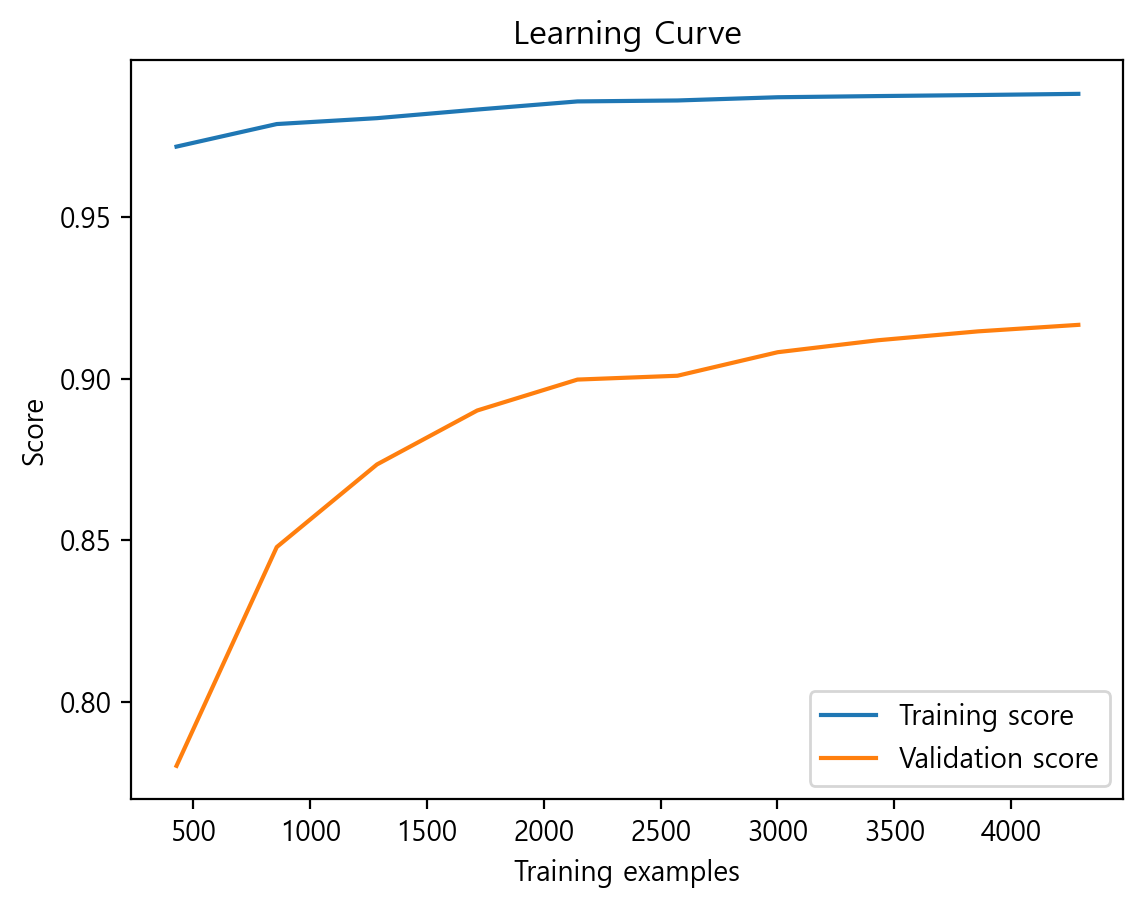

In [57]:
# 모델을 base model로 다시 학습
model_random_forest.fit(X_train, y_train)

# Learning Curve
train_sizes, train_scores, val_scores = learning_curve(model_random_forest, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=3)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.title('Learning Curve')
plt.show()

##### learning curve - MSE

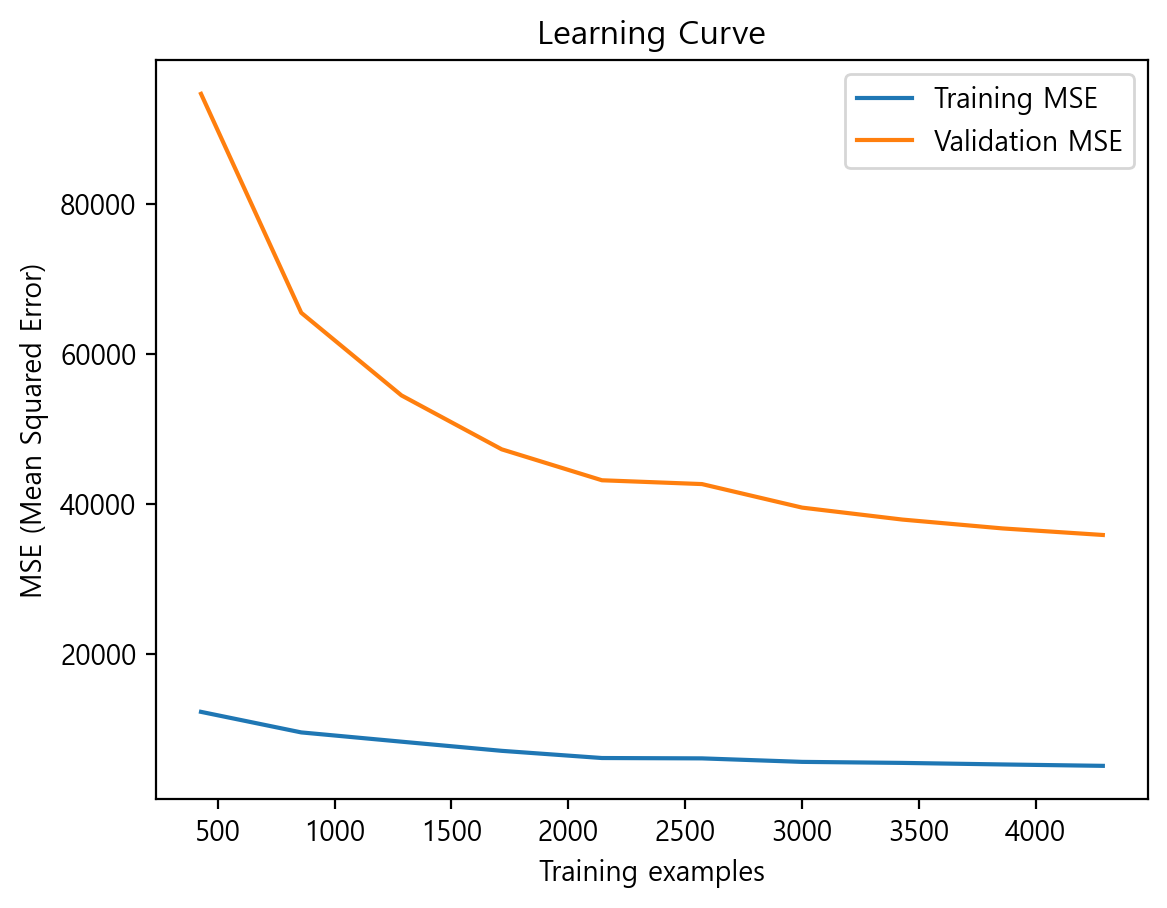

In [58]:
# 모델을 base model로 다시 학습
model_random_forest.fit(X_train, y_train)

# Learning Curve
train_sizes, train_scores, val_scores = learning_curve(model_random_forest, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=3, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training MSE')
plt.plot(train_sizes, val_scores_mean, label='Validation MSE')
plt.xlabel('Training examples')
plt.ylabel('MSE (Mean Squared Error)')
plt.legend()
plt.title('Learning Curve')
plt.show()


In [ ]:
# examples 수가 적을 때는 과적합이 발생하는 것처럼 보이지만,
# examples 수가 충분히 커질 때는 과적합이 발생한다고 보기에는 어렵다.

##### validation curve

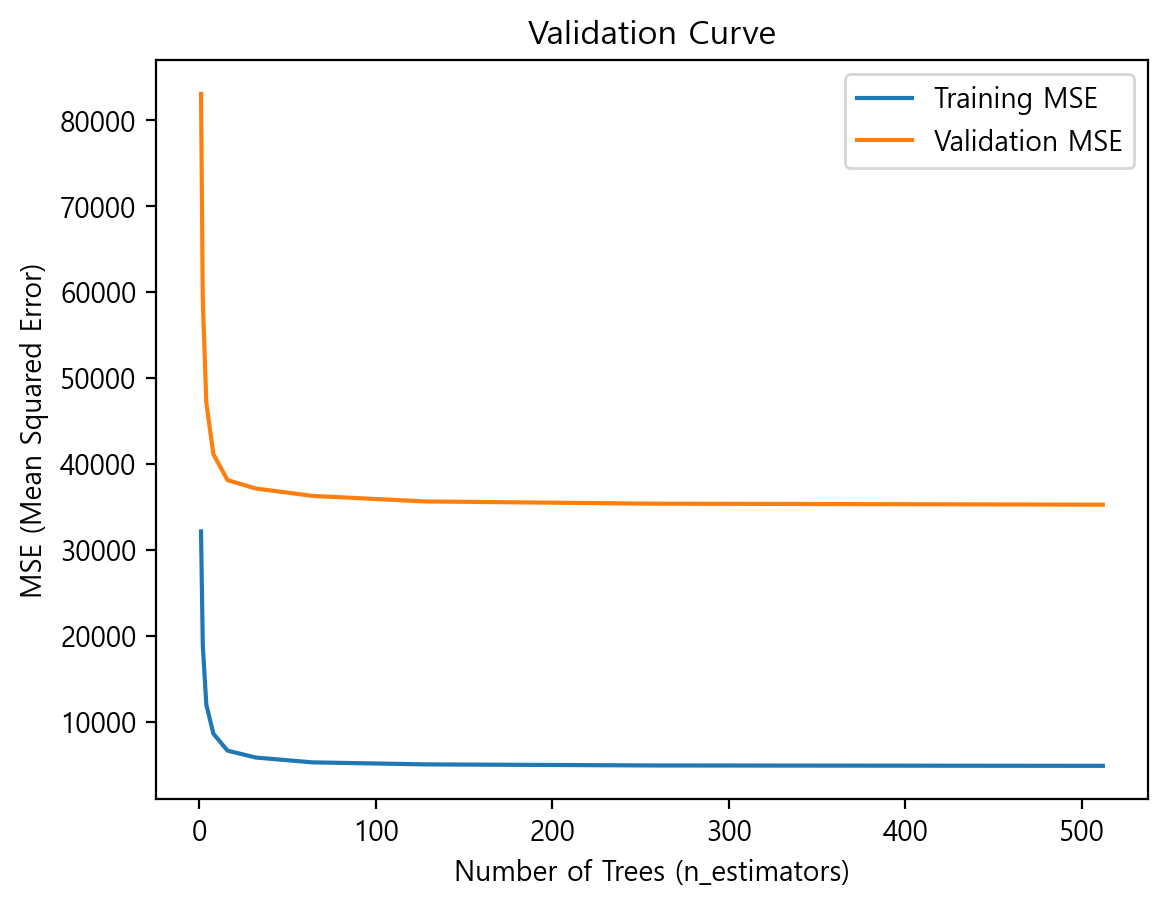

In [61]:
from sklearn.model_selection import validation_curve

# tree 다양화
param_range = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]  # You can adjust this range based on your needs

train_scores, val_scores = validation_curve(
    model_random_forest, X_train, y_train, param_name='n_estimators', param_range=param_range,
    cv=3, scoring='neg_mean_squared_error'
)
train_scores_mean = -np.mean(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
plt.plot(param_range, train_scores_mean, label='Training MSE')
plt.plot(param_range, val_scores_mean, label='Validation MSE')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('MSE (Mean Squared Error)')
plt.legend()
plt.title('Validation Curve')
plt.show()


In [ ]:
# 이 그래프만 가지고 판단하기에는 한계가 있다고 생각했다

##### 변수 중요도

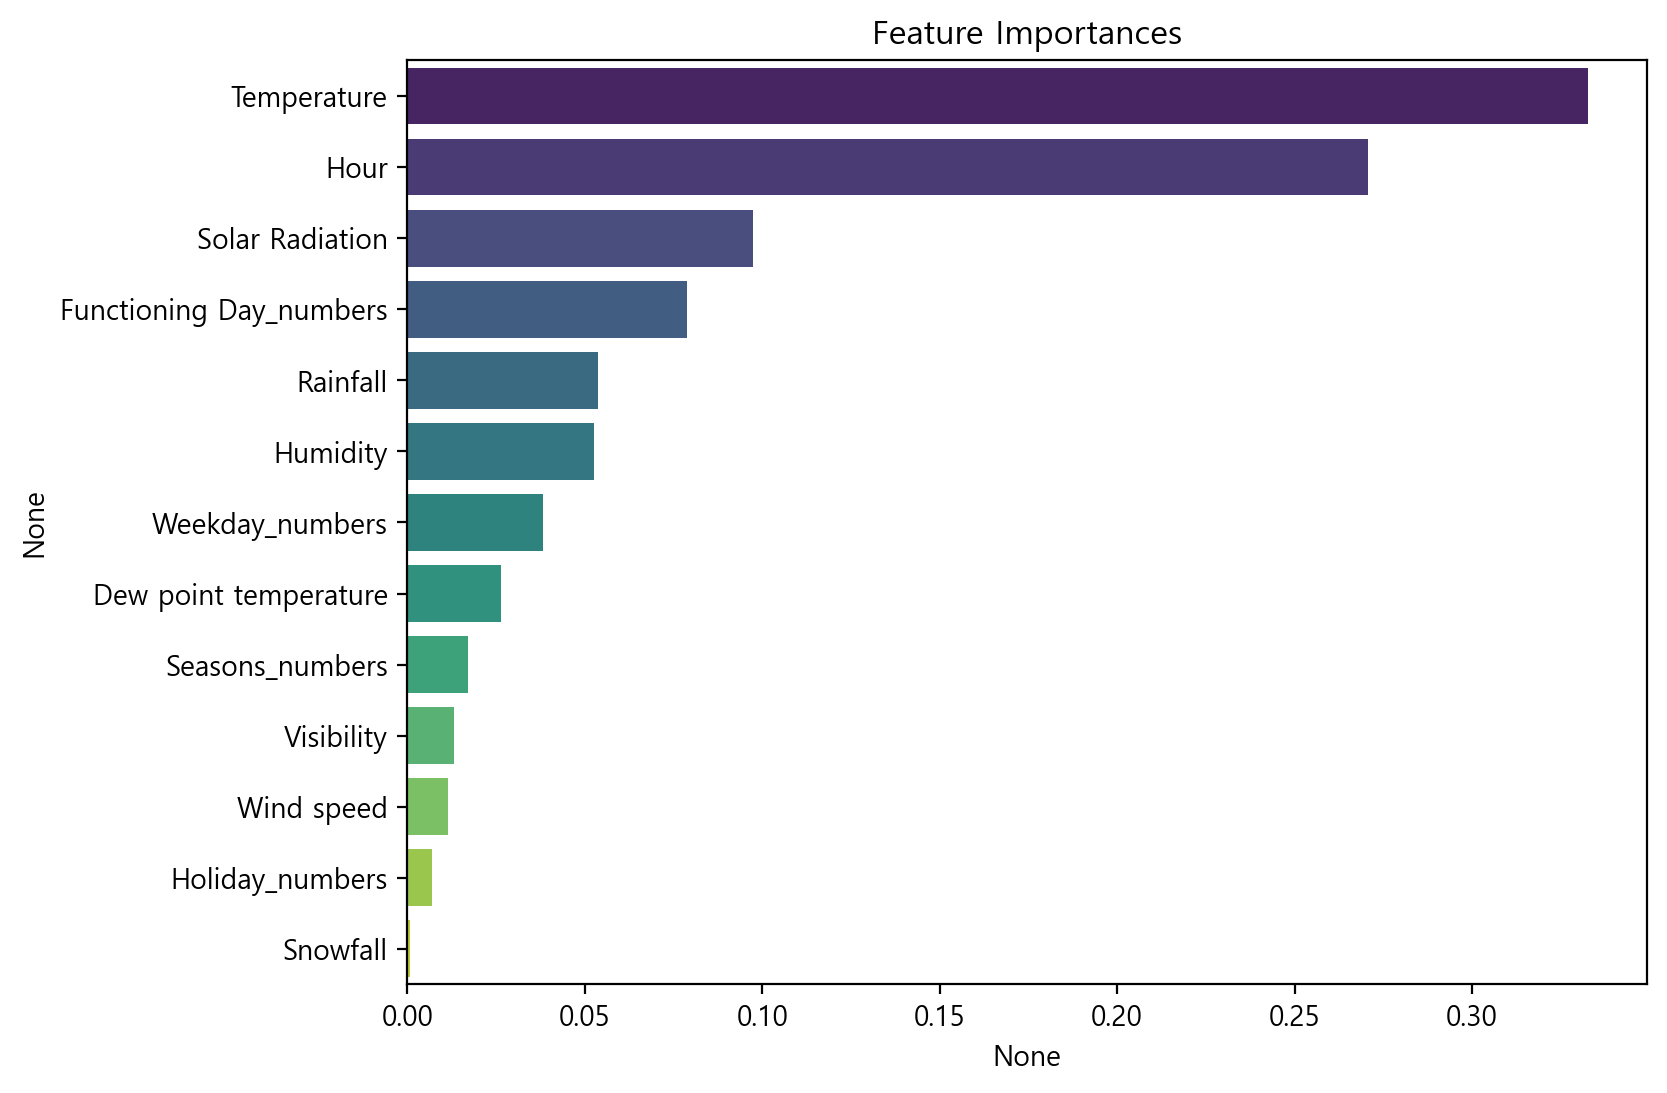

In [63]:
importances_values = pd.Series(model_random_forest.feature_importances_, index=X_val.columns).sort_values(ascending=False)

# 시각화
colors = sns.color_palette("viridis", len(importances_values))
plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
sns.barplot(x=importances_values, y=importances_values.index, palette=colors)
plt.show()

In [64]:
# 보면 알 수 있듯이 온도가 가장 큰 영향을 미치는 것을 알 수 있음
# 그리고 시간인데 시간이 커질 수록, 즉 저녁 시간대로 갈 수록 영향이 큼
# 하지만 시간의 경우 아침 시간대를 특히 유의해서 고려해야함
# Solar Radiation도 마찬가지로 태양 복사가 대여량에 영향을 미치는 것을 알 수 있음

##### test data 예측 - Final

In [69]:
X_test.head()

,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons_numbers,Holiday_numbers,Functioning Day_numbers,Weekday_numbers
0,0,5.7,62,2.30,1909,-1.0,0.0,0.0,0.0,3,0,1,4
1,1,5.1,65,1.60,1932,-0.9,0.0,0.0,0.0,3,0,1,4
2,2,4.4,64,1.15,2000,-1.8,0.0,0.0,0.0,3,0,1,4
3,3,4.2,65,0.70,1962,-1.8,0.0,0.0,0.0,3,0,1,4
4,4,3.6,70,0.80,1934,-1.3,0.0,0.0,0.0,3,0,1,4


In [74]:
X_train.head()

,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons_numbers,Holiday_numbers,Functioning Day_numbers,Weekday_numbers
921,9,0.8,47,0.9,1070,-9.2,0.05,0.0,0.0,0,0,1,1
322,10,-7.7,43,0.9,1555,-18.1,0.35,0.0,0.0,0,0,1,4
4299,3,20.0,58,1.8,1279,11.4,0.00,0.0,0.0,1,0,1,2
4907,11,27.5,31,1.9,1841,8.8,2.70,0.0,0.0,2,0,1,6
6217,1,23.4,47,2.1,2000,11.4,0.00,0.0,0.0,2,0,1,5


In [89]:
# 최종 모델의 경우 하이퍼파라미터 그리드 서치가 시간이 오래걸려 불가했고,
# 일일이 수정하는 과정을 거쳤지만, base model의 성능이 가장 좋았다.
# 따라서 모델을 그대로 잡고, test를 진행하였다.

# 추후에 모델 파라미터를 제대로 찾아볼 필요성이 있다. 
model_random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

##### Test 1

In [93]:
# 다시 학습...
model_random_forest.fit(X_train, y_train)

# 학습할 때 사용된 특성들만 선택하여 예측 수행
predictions_1 = model_random_forest.predict(X_test[X_train.columns])


In [97]:
predictions_1

array([ 477.41,  422.1 ,  298.54,  203.15,  174.6 ,  179.42,  354.69,
       1192.15, 1458.23, 1097.13,  978.21,  929.68, 1002.21, 1014.99,
       1022.93, 1083.76, 1293.21, 1714.35, 1780.87, 1332.57, 1235.59,
       1256.7 , 1114.48,  910.23,  623.27,  537.56,  373.12,  207.27,
        156.03,  161.21,  370.58, 1128.22, 1576.55, 1133.89,  982.62,
        949.33, 1049.82, 1157.43, 1169.76, 1228.8 , 1444.  , 1828.63,
       1607.23, 1413.63, 1288.4 , 1070.21, 1024.97,  898.3 ,  618.7 ,
        571.11,  372.86,  152.51,   82.25,   83.11,  249.86,  754.26,
        942.98,  507.78,  249.48,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,   78.56,  168.39,
        348.23,  435.26,  664.76,  583.61,  430.99,  283.64,  131.01,
        147.13,  195.38,  632.76,  785.75,  665.65,  896.28,  908.09,
       1204.15, 1502.16, 1644.13, 1682.47, 1506.57, 1854.76, 1414.91,
       1102.26, 1204.06,  966.21,  821.66,  698.91,  590.54,  456.  ,
        263.96,  191

##### Test 2

In [104]:
# 모델을 학습할 때 사용된 특성의 순서 저장
feature_order = X_train.columns

# 테스트 데이터를 해당 순서에 맞게 재정렬
X_test = X_test[feature_order]

# 모델 예측
predictions_2 = model_random_forest.predict(X_test)

# 예측 결과를 데이터프레임으로 변환
predictions_df = X_test.copy()
predictions_df['Rented Bike Count'] = predictions_2

# 결과가 같을 수 밖에 없는 구조임
# 대여량은 소수점이 될 수 없으므로 반올림 진행 

predictions_df['Rented Bike Count'] = predictions_df['Rented Bike Count'].round(0)
predictions_df


,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons_numbers,Holiday_numbers,Functioning Day_numbers,Weekday_numbers,Rented Bike Count
0,0,5.7,62,2.30,1909,-1.0,0.0,0.0,0.0,3,0,1,4,477.0
1,1,5.1,65,1.60,1932,-0.9,0.0,0.0,0.0,3,0,1,4,422.0
2,2,4.4,64,1.15,2000,-1.8,0.0,0.0,0.0,3,0,1,4,299.0
3,3,4.2,65,0.70,1962,-1.8,0.0,0.0,0.0,3,0,1,4,203.0
4,4,3.6,70,0.80,1934,-1.3,0.0,0.0,0.0,3,0,1,4,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,19,4.2,34,2.60,1894,-10.3,0.0,0.0,0.0,3,0,1,5,1002.0
716,20,3.4,37,2.30,2000,-9.9,0.0,0.0,0.0,3,0,1,5,847.0
717,21,2.6,39,0.30,1968,-9.9,0.0,0.0,0.0,3,0,1,5,941.0
718,22,2.1,41,1.00,1859,-9.8,0.0,0.0,0.0,3,0,1,5,985.0


In [105]:
predictions_df.to_csv('test_예측완료.csv', index = False)

##### 예측 결과

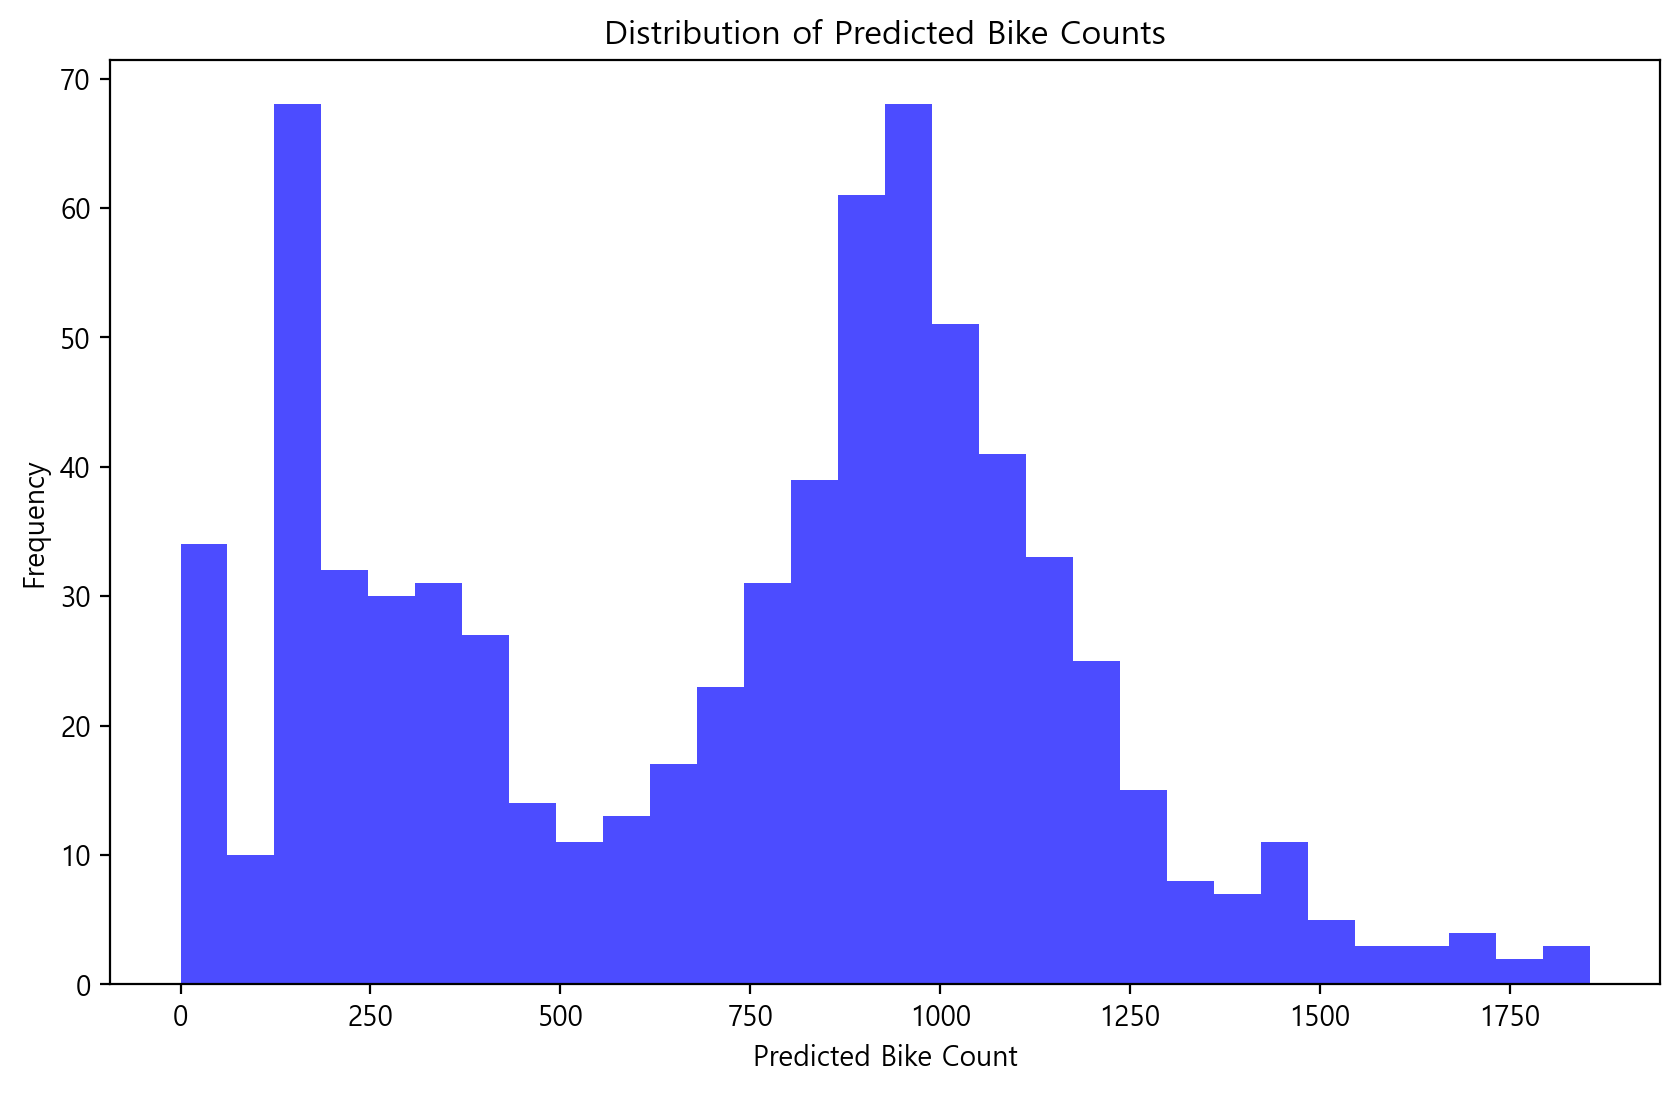

Sample Predictions:
0     477.0
1     422.0
2     299.0
3     203.0
4     175.0
5     179.0
6     355.0
7    1192.0
8    1458.0
9    1097.0
Name: Rented Bike Count, dtype: float64


In [111]:
# 예측 결과
plt.figure(figsize=(10, 6))
plt.hist(predictions_df['Rented Bike Count'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Predicted Bike Counts')
plt.xlabel('Predicted Bike Count')
plt.ylabel('Frequency')
plt.show()

# 몇 가지 예측값 출력해서 한 번 봐보자
sample_predictions = predictions_df['Rented Bike Count'][:10]  # 예측값 중에서 앞의 10개만 선택
print("Sample Predictions:")
print(sample_predictions)